<a href="https://colab.research.google.com/github/aranlemaur/dfedata6-final-project/blob/main/Enhanced-FINAL_Predicting_strokes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


**Answer: The data to be analysed is in the Stroke Prediction Dataset file from kaggle.com. Please find the raw file, this file and the clean file after cleaning in my GitHub repository: https://github.com/aranlemaur/dfedata6-final-project**

### Q. Define the problem domain

**Answer: This dataset shows different factors contributing to strokes. Analysing it will help determine which factors are more relevant and should be taken into account when making diagnosis. To be used by healthcare professionals.**

### Q. Identify candidate questions for your machine learning project

Answer: These are some candidate questions:
1.   How does age affect the possibility of having a stroke?
2.   And does smoking increase it?
3.   Does your marital status and your type of work affect the possibility of having a stroke?
4.   How does bmi affect the possibility of having a stroke?
5.   Does smoking 

### Q. Generate a descriptive statistics report for the columns in your dataset

In [1]:
# importing libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# first we read the file:
df = pd.read_csv('https://raw.githubusercontent.com/aranlemaur/dfedata6-final-project/main/stroke-data-raw.csv')

# then we read the data (head) in the file:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# descriptive report:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [5]:
# I want to see unique values too:
print("Gender: ",df["gender"].unique())
print("Hypertension: ",df["hypertension"].unique())
print("Heart Disease: ",df["heart_disease"].unique())
print("Ever Married: ",df["ever_married"].unique())
print("Work Type: ",df["work_type"].unique())
print("Residence type: ",df["Residence_type"].unique())
print("Smoking status: ",df["smoking_status"].unique())
print("Stroke: ",df["stroke"].unique())

Gender:  ['Male' 'Female' 'Other']
Hypertension:  [0 1]
Heart Disease:  [1 0]
Ever Married:  ['Yes' 'No']
Work Type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence type:  ['Urban' 'Rural']
Smoking status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Stroke:  [1 0]


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [6]:
# in the descriptive report above, I see there is at least one null value under the bmi column. Let's see how many missing values there are in total:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# how many values missing in bmi?
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# handling missing values in bmi: in the description table above I see values of min 10.30 and max 97.60, which most definitely are outliers.
# Because of this, instead of filling missing values with the mean, I will use the median.
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Answer: regarding the missing data, I am assuming they were missing completely at random (MCAR), which means that there is no relationship between the missingness of the data and any values, observed or missing.**

Q. Is there any correlation in the data? How would you decide which columns to keep?

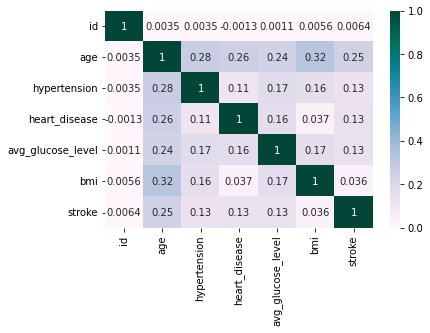

In [9]:
# plotting and using .corr()
dataplot = sns.heatmap(df.corr(), cmap="PuBuGn", annot=True)

In [10]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.005555,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.005555,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


**There are correlations in the data, age one of the most significant and recognisable factor at first.**

**The correlation function and graph only plot floats and ints, leaving behind objects. Before I convert these objects to ints, I want to have a look at which features to drop in graphs.**

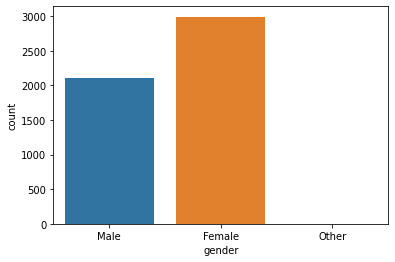

In [11]:
df["gender"].value_counts()
sns.countplot(x=df["gender"],data=df)

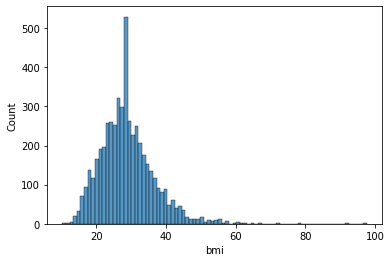

In [12]:
sns.histplot(df["bmi"]) # it seems there are outliers in the higher end

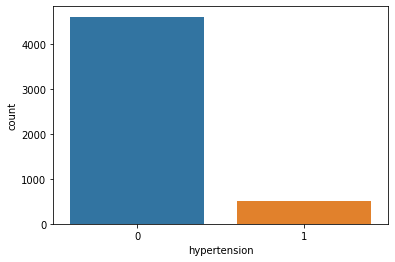

In [13]:
df["hypertension"].value_counts()
sns.countplot(x=df["hypertension"], data=df)

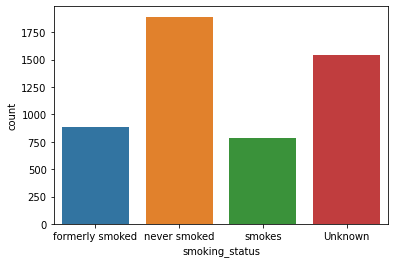

In [14]:
df["smoking_status"].value_counts()
sns.countplot(x=df["smoking_status"], data=df) 

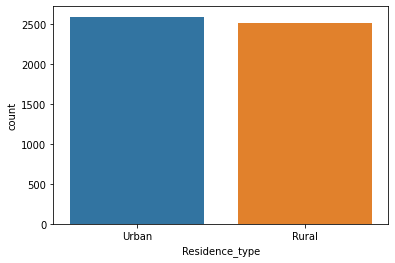

In [15]:
df["Residence_type"].value_counts()
sns.countplot(x=df["Residence_type"], data=df) 

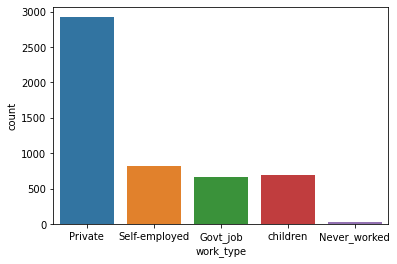

In [16]:
df["work_type"].value_counts()
sns.countplot(x=df["work_type"], data=df) 

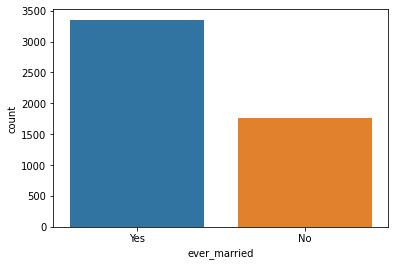

In [17]:
df["ever_married"].value_counts()
sns.countplot(x=df["ever_married"], data=df) 

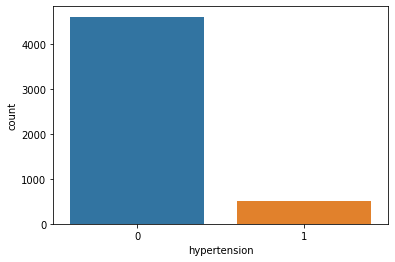

In [18]:
df["hypertension"].value_counts()
sns.countplot(x=df["hypertension"], data=df) 

**Answer: having had a look at the plots and correlation table above, I can drop: the residence_type column because the values are pretty much 50/50, and the gender column because there is not a big difference in between the two main categories (with Other being marginal).**

In [19]:
df = df.drop(['gender', 'Residence_type'], axis = 1)
df.head()

,id,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,51676,61.0,0,0,Yes,Self-employed,202.21,28.1,never smoked,1
2,31112,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,60182,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,1665,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                5110 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 399.3+ KB


Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

**Answer: having a look at the table above, I still have three columns that are objects and need converting to int. I will use label encoding to handle these categorical variables. With this approach, each value is assigned a unique integer.**

In [21]:
# ever_married:  ['Yes' 'No']
df['ever_married'] = df['ever_married'].replace({'No':0, 'Yes': 1})
df.head()

,id,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,67.0,0,1,1,Private,228.69,36.6,formerly smoked,1
1,51676,61.0,0,0,1,Self-employed,202.21,28.1,never smoked,1
2,31112,80.0,0,1,1,Private,105.92,32.5,never smoked,1
3,60182,49.0,0,0,1,Private,171.23,34.4,smokes,1
4,1665,79.0,1,0,1,Self-employed,174.12,24.0,never smoked,1


In [22]:
# work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
df['work_type'] = df['work_type'].replace({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'Never_worked': 3, 'children': 4})
df.head()

,id,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,67.0,0,1,1,0,228.69,36.6,formerly smoked,1
1,51676,61.0,0,0,1,1,202.21,28.1,never smoked,1
2,31112,80.0,0,1,1,0,105.92,32.5,never smoked,1
3,60182,49.0,0,0,1,0,171.23,34.4,smokes,1
4,1665,79.0,1,0,1,1,174.12,24.0,never smoked,1


In [23]:
# smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked':0, 'never smoked': 1, 'smokes':2, 'Unknown': 3})
df.head()

,id,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,67.0,0,1,1,0,228.69,36.6,0,1
1,51676,61.0,0,0,1,1,202.21,28.1,1,1
2,31112,80.0,0,1,1,0,105.92,32.5,1,1
3,60182,49.0,0,0,1,0,171.23,34.4,2,1
4,1665,79.0,1,0,1,1,174.12,24.0,1,1


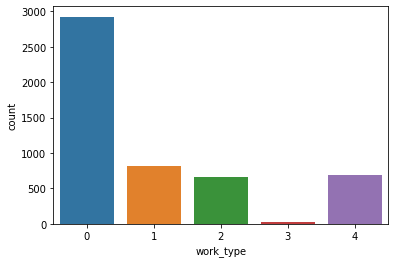

In [24]:
# checking a plot to see if I see the same as above:
df["work_type"].value_counts()
sns.countplot(x=df["work_type"], data=df) # I see the same (4 is children)

In [25]:
# last check - everything has been converted properly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                5110 non-null   float64
 8   smoking_status     5110 non-null   int64  
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 399.3 KB


Q. Is there any imbalance in the label
?

In [26]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [27]:
stroke_f = df[df['stroke'] == 0]
print('Percentage of people who have not had a stroke:', len(stroke_f)/len(df)*100,'%')

Percentage of people who have not had a stroke: 95.12720156555773 %


**Answer: this dataset shows a higher representation of people who have not had a stroke, which means that this feature can be skewed and the problem is that our model may be biased towards the majority class.**

Q. Are there any outliers in the dataset? What do you do with them?

In [28]:
from scipy.stats import zscore

In [29]:
data = df.apply(zscore)
data

,id,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,-1.298312,1.051434,-0.328602,4.185032,0.723884,-0.697368,2.706375,1.005086,-1.451388,4.418381
1,0.716371,0.786070,-0.328602,-0.238947,0.723884,0.022978,2.121559,-0.098981,-0.535985,4.418381
2,-0.255478,1.626390,-0.328602,4.185032,0.723884,-0.697368,-0.005028,0.472536,-0.535985,4.418381
3,1.118363,0.255342,-0.328602,-0.238947,0.723884,-0.697368,1.437358,0.719327,0.379417,4.418381
4,-1.647136,1.582163,3.043196,-0.238947,0.723884,0.022978,1.501184,-0.631531,-0.535985,4.418381
...,...,...,...,...,...,...,...,...,...,...
5105,-0.864089,1.626390,3.043196,-0.238947,0.723884,-0.697368,-0.494658,-0.098981,-0.535985,-0.226327
5106,0.394863,1.670617,-0.328602,-0.238947,0.723884,0.022978,0.420775,1.446713,-0.535985,-0.226327
5107,-0.793720,-0.363842,-0.328602,-0.238947,0.723884,0.022978,-0.511443,0.225745,-0.535985,-0.226327
5108,0.048497,0.343796,-0.328602,-0.238947,0.723884,-0.697368,1.328257,-0.423706,-1.451388,-0.226327


**Answer: there are outliers, which are the ones that deviate </>3 from the mean. There are false positives in the table above, because we need to consider that the Hypertension, Heart Disease and Stroke features have 0/1 values.**

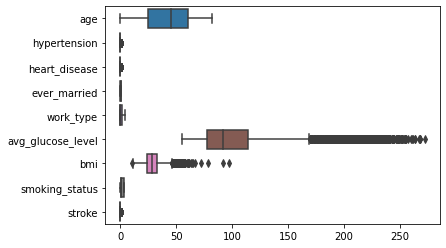

In [33]:
df1 = df.drop(['id'], axis = 1)
data = df1.apply(zscore)
plot = sns.boxplot(data=df1, orient="h")

**Answer: From the boxplot above, we can see many outliers in the avg_glucose_level and bmi columns. These outliers, however, could be the reason why strokes happen in a real-world scenario. For example, glucose levels of +250 seem extremely high, but they could happen because of age, life style and comorbidities. Therefore, I want to keep them for ML.**

Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [34]:
# setting the index
df.set_index('id', inplace=True)
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,
9046,67.0,0,1,1,0,228.69,36.6,0,1
51676,61.0,0,0,1,1,202.21,28.1,1,1
31112,80.0,0,1,1,0,105.92,32.5,1,1
60182,49.0,0,0,1,0,171.23,34.4,2,1
1665,79.0,1,0,1,1,174.12,24.0,1,1


In [35]:
x = df
y = df.loc[:, ['stroke']]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
xtrain,xtest, ytrain,ytest = train_test_split(x, y, test_size=0.2)

In [38]:
# preparing data to go to Azure
df.to_csv('stroke-data-clean.csv')

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

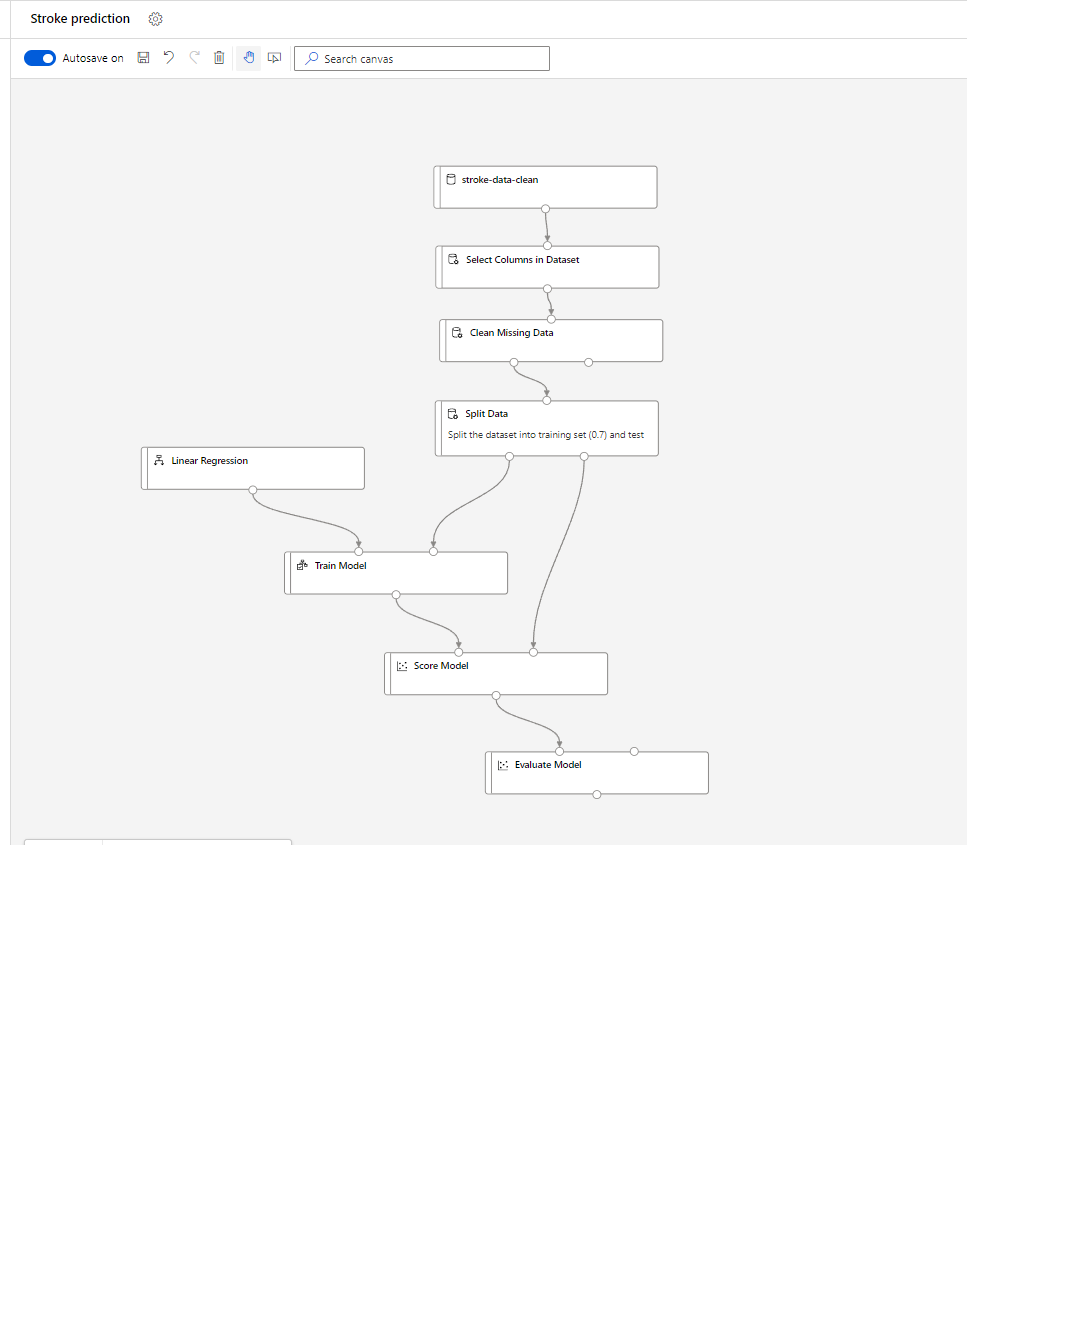

**Linear regression chosen as I am predicting a number in a sample of <100k data.**

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

**Answer: The best regression metrics are RAE and RSE, as follows:**

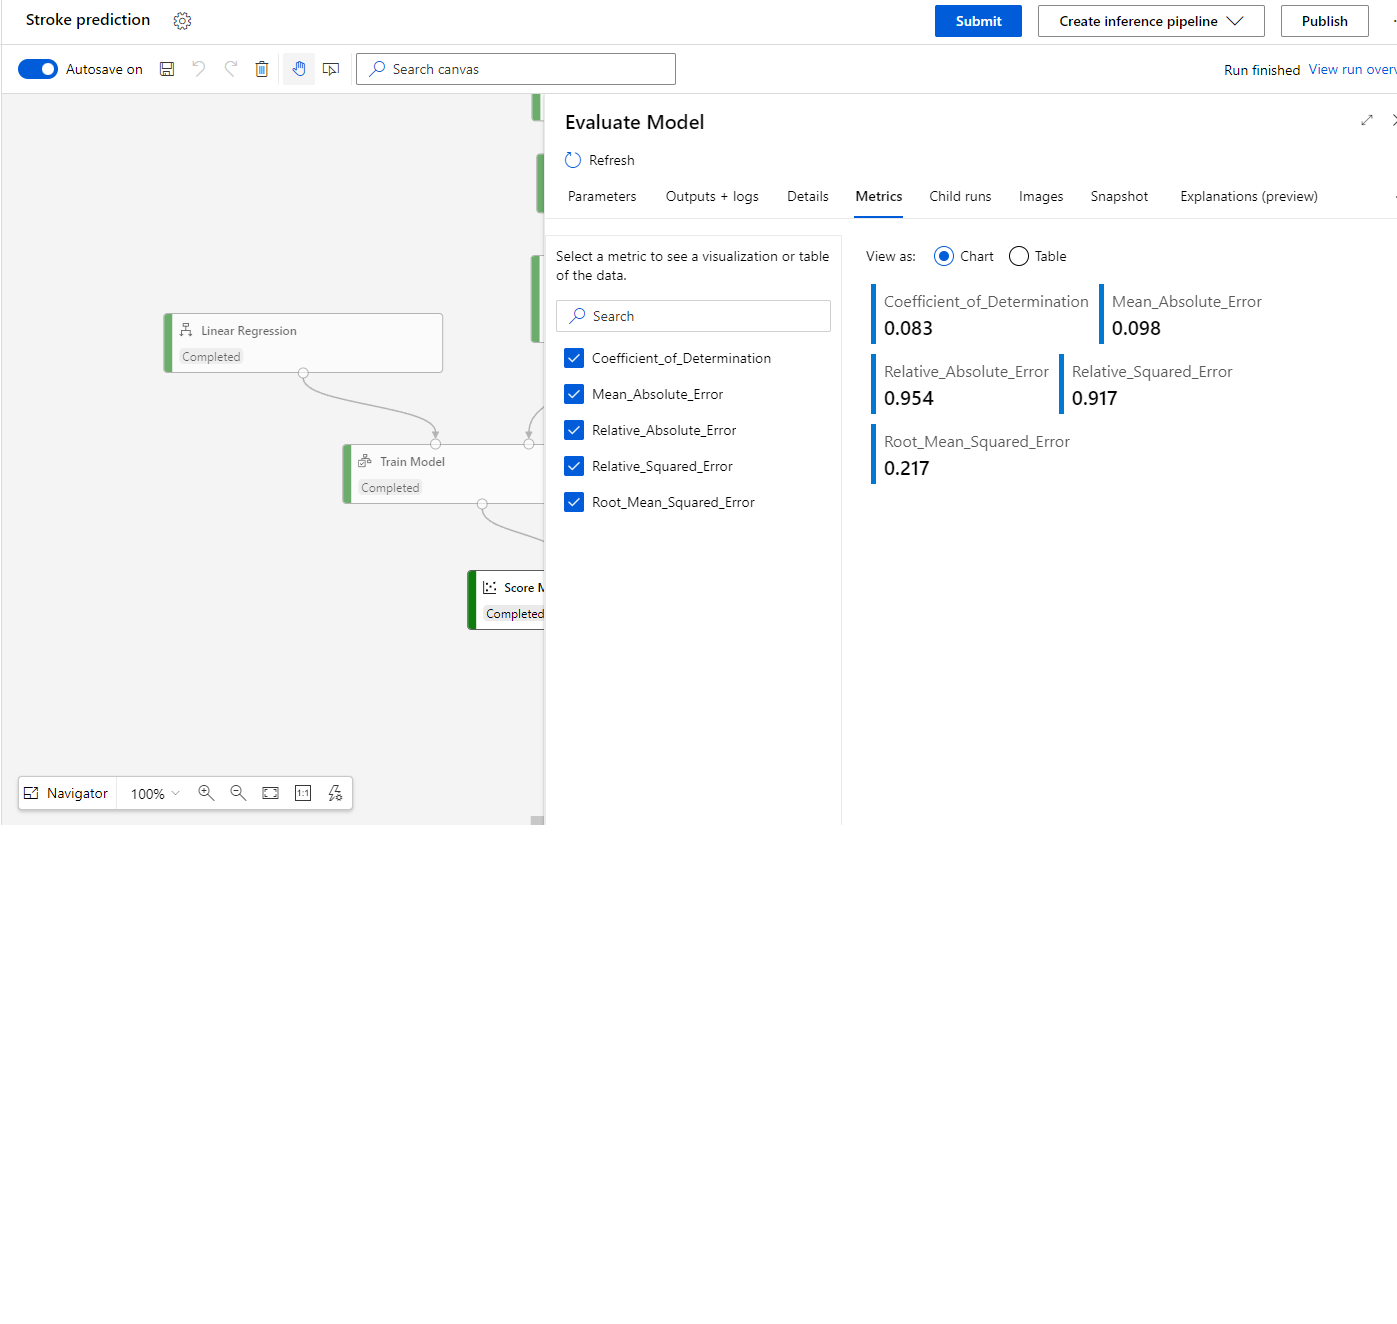

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

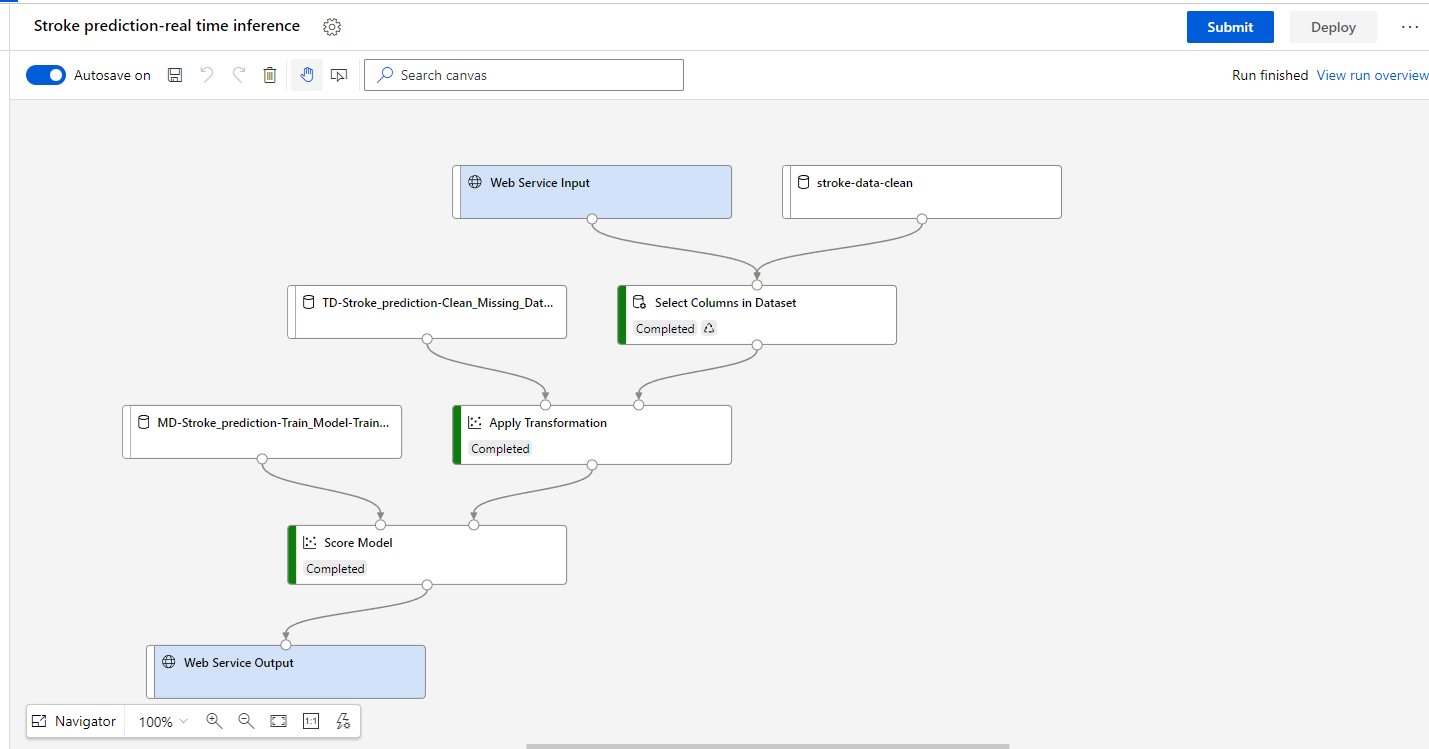

**Deployment to a container instance:**

In [ ]:
# azureml-core of version 1.0.72 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '37380390-c51c-4cde-8bf2-53c439d287f1'
resource_group = 'finalproject'
workspace_name = 'finalfile'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='MD-Stroke_prediction-Train_Model-Trained_model-6ad00c02')
dataset.download(target_path='.', overwrite=False)